In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
#plt.style.use(['dark_background'])
#plt.style.use('seaborn-dark', 'presentation')
#import json

### Understanding GB_csv

In [94]:
GB_csv = pd.read_csv("GBvideos.csv")

GB_csv

In [96]:
GB_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,28421.0,1.744601e+01,7.690715e+00,1.0,10.0,22.0,24.0,29.0
views,28421.0,4.633962e+06,1.734725e+07,851.0,182820.0,689896.0,2515417.0,424538912.0
likes,28421.0,1.067375e+05,2.953774e+05,0.0,4372.0,17976.0,80521.0,4737873.0
dislikes,28421.0,6.917841e+03,5.758249e+04,0.0,150.0,583.0,2486.0,1944971.0
comment_count,28421.0,1.104017e+04,4.781586e+04,0.0,507.0,1795.0,6846.0,1626501.0


In [97]:
GB_csv.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.147552,-0.165983,-0.003547,-0.030714,0.005277,-0.086374,NaN
views,-0.147552,1.000000,0.781430,0.346622,0.402749,0.010885,0.029793,NaN
likes,-0.165983,0.781430,1.000000,0.429384,0.665615,-0.039194,-0.032353,NaN
dislikes,-0.003547,0.346622,0.429384,1.000000,0.845927,-0.005813,-0.010756,NaN
comment_count,-0.030714,0.402749,0.665615,0.845927,1.000000,-0.031180,-0.019862,NaN
comments_disabled,0.005277,0.010885,-0.039194,-0.005813,-0.031180,1.000000,0.561426,NaN
ratings_disabled,-0.086374,0.029793,-0.032353,-0.010756,-0.019862,0.561426,1.000000,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
GB_csv['dislikes'].mean()

6917.840681186447

GB_csv['dislikes'].median

GB_csv['dislikes'].value_counts()

## Cleaning GB_csv

In [101]:
#Need to convert object to category?
GB_csv.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [102]:
#Select all columns of type 'object'
object_columns = GB_csv.select_dtypes(['object']).columns
object_columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'description'],
      dtype='object')

In [103]:
#Convert selected columns to type 'category'
for column in object_columns: 
    GB_csv[column] = GB_csv[column].astype('category')
GB_csv.dtypes   

video_id                  category
trending_date             category
title                     category
channel_title             category
category_id                  int64
publish_time              category
tags                      category
views                        int64
likes                        int64
dislikes                     int64
comment_count                int64
thumbnail_link            category
comments_disabled             bool
ratings_disabled              bool
video_error_or_removed        bool
description               category
dtype: object

In [104]:
#Checking for null values
GB_csv.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               375
dtype: int64

GB_csv['description']

In [106]:
#for every empty description value in GB_csv, convert to NaN
#GB_csv.select_dtypes(['object']).describe().T

In [107]:
#convert null values to 0
GB_csv['description'] = GB_csv[['description']].replace('none', 0)

GB_csv['description'].tail(100)

GB_csv['video_id'].value_counts()

GB_csv['trending_date'].value_counts()

GB_csv['title'].value_counts()

GB_csv['channel_title'].value_counts()

GB_csv['publish_time'].value_counts()

GB_csv['tags'].value_counts()

#### Data quality plan

Convert [none] to 0

Drop thumbnail link column

GB_csv['description'].value_counts()

GB_csv['description'].head(500)

In [117]:
GB_csv.select_dtypes(['bool']).describe().T

,count,unique,top,freq
comments_disabled,28421,2,False,27912
ratings_disabled,28421,2,False,28195
video_error_or_removed,28421,1,False,28421


In [118]:
GB_csv['comments_disabled'].value_counts()

False    27912
True       509
Name: comments_disabled, dtype: int64

In [119]:
GB_csv['ratings_disabled'].value_counts()

False    28195
True       226
Name: ratings_disabled, dtype: int64

In [120]:
#All values are false- drop this column
GB_csv['video_error_or_removed'].value_counts()

False    28421
Name: video_error_or_removed, dtype: int64

In [121]:
GB_csv.select_dtypes(['int']).describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,28421.0,1.744601e+01,7.690715e+00,1.0,10.0,22.0,24.0,29.0
views,28421.0,4.633962e+06,1.734725e+07,851.0,182820.0,689896.0,2515417.0,424538912.0
likes,28421.0,1.067375e+05,2.953774e+05,0.0,4372.0,17976.0,80521.0,4737873.0
dislikes,28421.0,6.917841e+03,5.758249e+04,0.0,150.0,583.0,2486.0,1944971.0
comment_count,28421.0,1.104017e+04,4.781586e+04,0.0,507.0,1795.0,6846.0,1626501.0


GB_csv['views'].value_counts()

GB_csv['likes'].value_counts()

GB_csv['dislikes'].value_counts()

GB_csv['comment_count'].value_counts()

#### Summary of data quality plan:

   
| Feature                   | Data Quality Issue   | Handling Strategy            |
|---------------------------|----------------------|------------------------------|
| thumbnail link            | Unnecessary data     | Remove column                |
| video_error_or_removed    |  100% values = false | Drop column                  |
| description               | 0.01% null values    | Convert to 0                 |

In [126]:
GB_youtube_df= GB_csv.drop(['thumbnail_link','video_error_or_removed'], axis=1)

### Scatterplot matrix of continous features

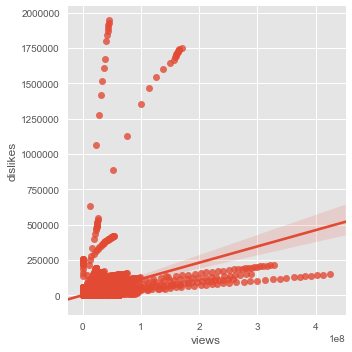

In [127]:
sns.lmplot(x='views', y='dislikes', data=GB_youtube_df)

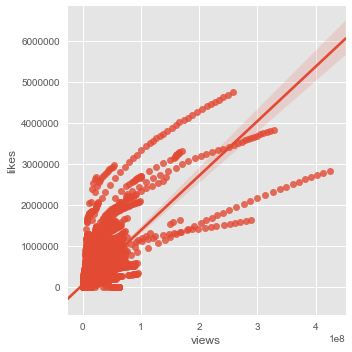

In [128]:
sns.lmplot(x='views', y='likes', data=GB_youtube_df)

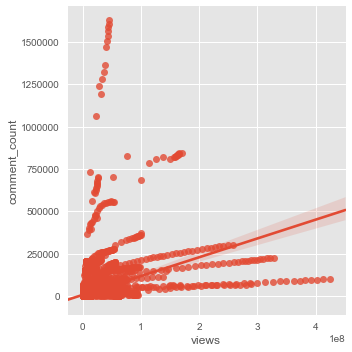

In [129]:
sns.lmplot(x='views', y='comment_count', data=GB_youtube_df)

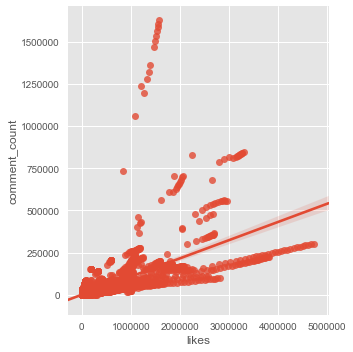

In [130]:
sns.lmplot(x='likes', y='comment_count', data=GB_youtube_df)

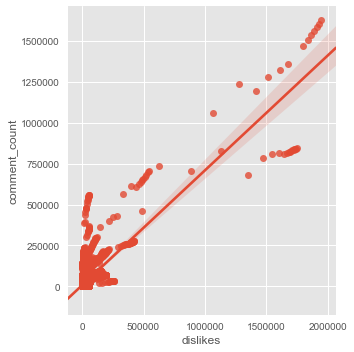

In [131]:
sns.lmplot(x='dislikes', y='comment_count', data=GB_youtube_df)

### Plot all features 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

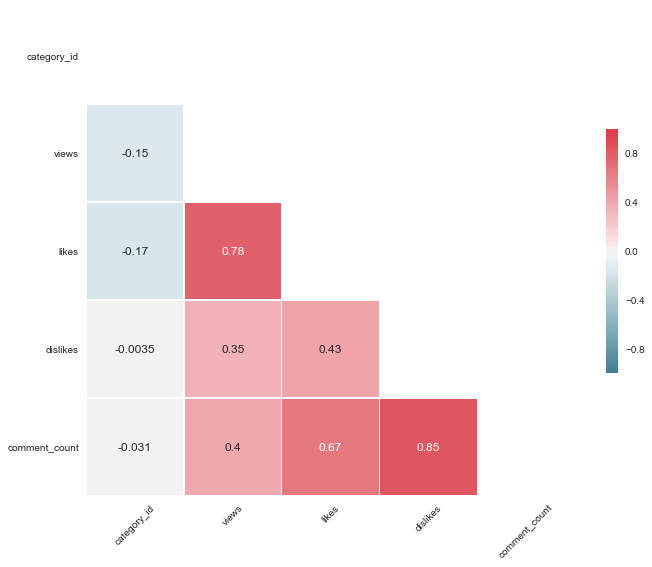

In [134]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
GB_youtube_df = pd.read_csv("GBvideos.csv")
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = GB_youtube_df[['category_id','views','likes','dislikes','comment_count']].columns

# Calculate correlation of all pairs of continuous features
corr = GB_youtube_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

GB_youtube_df['likes'].value_counts()

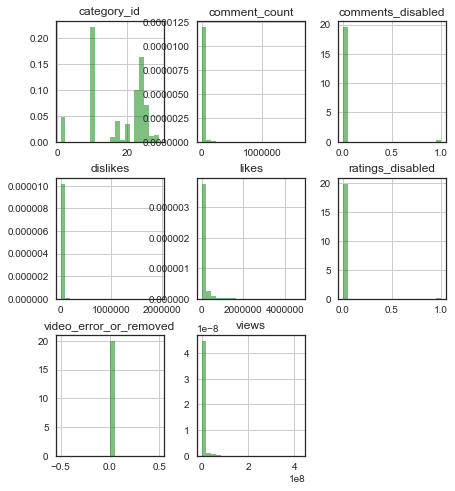

In [136]:
GB_youtube_df.hist(bins=20, normed=True, alpha=0.5, figsize=(7,8),
         histtype='stepfilled', color='green',
         edgecolor='none');

### Create feature matrix and response vector


Features are predictors/inputs/attributes
The 'response' is the target, label, output

In [137]:
#x = dataframe with all columns apart from views
#y = views
#capital 'X' for 2 dimensional
#capital 'Y' for 1 dimensional 

GB_X = GB_youtube_df[['likes','dislikes','comment_count']]
GB_y = GB_youtube_df[['views']]

#target = views

In [138]:
#shapes of x and y 
GB_X.shape

(28421, 3)

In [139]:
GB_y.shape

(28421, 1)

In order to build a model the features must be numeric, and every observation must have the same features in the same order. Can transfer text to numbers but all data fed into model must be numeric.  

In [140]:
#import the class
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
knn = KNeighborsClassifier()

#fit the model with data (occurs in-place)
knn.fit(GB_X,GB_y)

/Users/lindasmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [141]:
#examine first 5 rows of the feature matrix
GB_X.head()

,likes,dislikes,comment_count
0,55681,10247,9479
1,25561,2294,2757
2,787420,43420,125882
3,193,12,37
4,30,2,30


In [142]:
#examine the response vector
GB_y

,views
0,7224515
1,1053632
2,17158579
3,27833
4,9815
5,1182775
6,33523622
7,1164201
8,154494
9,9548677


In [143]:
#prediction data must match training data dimension/shape
#predict the response for a new observation
knn.predict([[3,5,4]])

array([1192])

### Representing text as numerical data

In [144]:
simple_train = ['official','music','podcast','documentary','iTunes','episode','spotify','ft.','subscribe']

In [145]:
#sample response vector
yt_keywords = [0,0,0,1,1,1,1,0,1]

In [146]:
#import and instantiate CountVectorizer (with the default parameters)f
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [147]:
#learn the vocabulary of the training data (occurs in place)
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [148]:
#examine the fitted vocabulary, outputs vocabulary as a list
#ignores punctuation, duplication
vect.get_feature_names()

['documentary',
 'episode',
 'ft',
 'itunes',
 'music',
 'official',
 'podcast',
 'spotify',
 'subscribe']

In [149]:
#transform training data into a "document-term matrix"
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<9x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [150]:
simple_train_dtm.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [151]:
#bag of words strategy/tokenization
#examining the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())

,documentary,episode,ft,itunes,music,official,podcast,spotify,subscribe
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1


In [152]:
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [153]:
print(simple_train_dtm)

  (0, 5)	1
  (1, 4)	1
  (2, 6)	1
  (3, 0)	1
  (4, 3)	1
  (5, 1)	1
  (6, 7)	1
  (7, 2)	1
  (8, 8)	1


In [154]:
#build a model to predict youtube keywords
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(simple_train_dtm, yt_keywords)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [155]:
#example test for model testing
simple_test = ['music']

In order to make a prediction, the new observation mus have the same feaatures as the trining observations, both in number and meaning.

In [156]:
#skip the fit, as fit is where vocabulary gets learned
#transforming testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [157]:
#examine the vocabulary and document-term matrix together
#created feature matrix with same features 
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,documentary,episode,ft,itunes,music,official,podcast,spotify,subscribe
0,0,0,0,0,1,0,0,0,0


In [158]:
#predict whether simple_test is a youtube keyword
knn.predict(simple_test_dtm)

array([0])

> * `Summary `

`* vect.fit(train) learns the vocabulary of the training data`

`* vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data`

`* vect.transform(test) used the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)`




## Text based processing 
How can I import and parse the text column of description and somehow count the frequency /occurrences of words 

In [174]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from yellowbrick.style.colors import resolve_colors, get_color_cycle

In [175]:
text = GB_youtube_df['description'].str.lower()
#df['url'] = df['url'].str.lower()

text

In [177]:
#instantiate vectorizer
vectorizer = CountVectorizer()

In [178]:
#convert text from object into string? 
#text = GB_youtube_df['description'] = GB_youtube_df['description'].astype('str')
GB_youtube_df['description'] = GB_youtube_df['description'].astype('U')

#text type is changed to unicode even though datatype remains as object
#unicode_text
GB_youtube_df['description'] 

In [181]:
print(type(text))

<class 'pandas.core.series.Series'>


In [182]:
text = GB_youtube_df['description'].str.lower()

In [183]:
vectorizer = CountVectorizer()

In [170]:
#convert description text to type unicode
x = vectorizer.fit_transform(GB_youtube_df['description'].values.astype('U')) 
#x = vectorizer.fit_transform(GB_youtube_df['description'])

In [171]:
x

<28421x38302 sparse matrix of type '<class 'numpy.int64'>'
	with 2335857 stored elements in Compressed Sparse Row format>

In [172]:
type(x)

scipy.sparse.csr.csr_matrix

In [184]:
#tokenize and build vocab
#vectorizer.fit(x) - error: lower not found

vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#summarize
print(vectorizer.vocabulary_)

In [186]:
#encode document
vector = vectorizer.transform(text)

In [187]:
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(28421, 38302)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


### Plot token frequency distribution <font color = "#4DB6AC"> Description Box </font>

In [ ]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

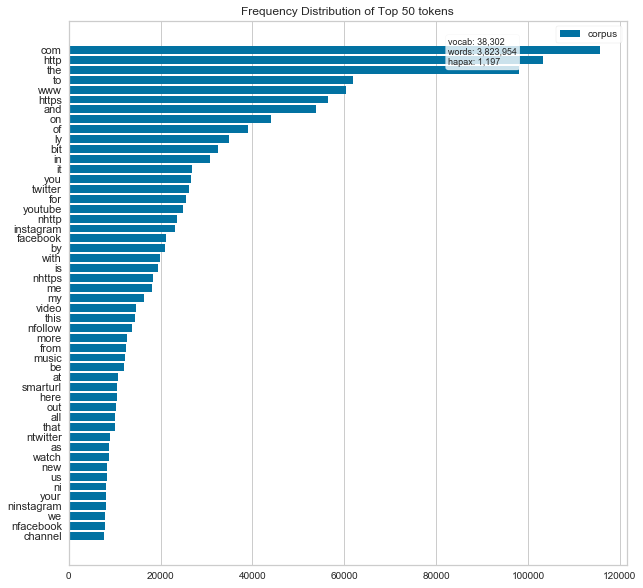

In [189]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 11

### Plotting frequency of distribution without 'stop words'

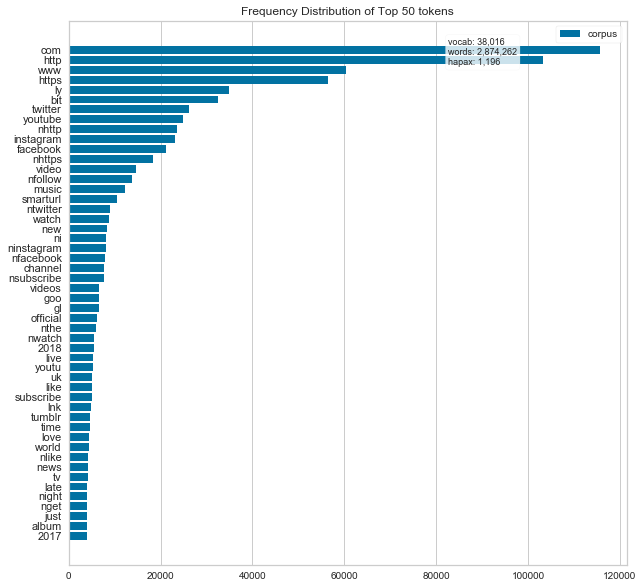

In [190]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#plt.rcParams["ytick.labelsize"] = 12

How to parse text to remove 'n' character in front of words

### Plot token frequency distribution <font color = "#8E44AD"> Title </font>

In [197]:
GB_youtube_df['title'] = GB_youtube_df['title'].astype('U')

GB_youtube_df['title']

In [199]:
title_text = GB_youtube_df['title'].str.lower()

In [200]:
vectorizer.fit(title_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

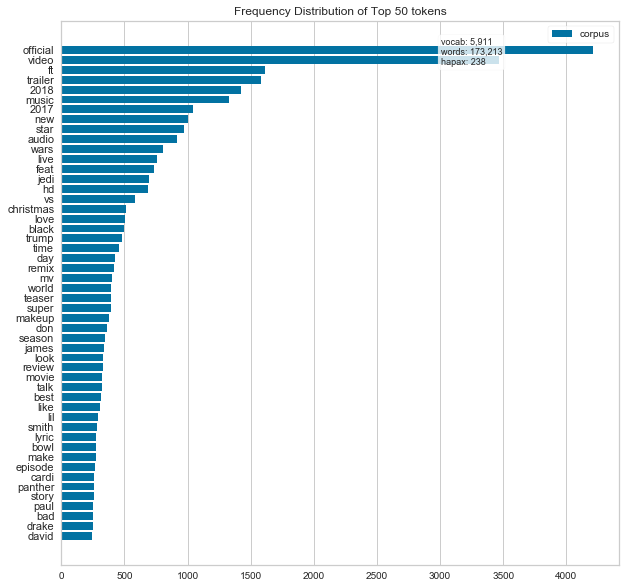

In [202]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(title_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

Frequency distribution for UK youtube data: title

### Plot token frequency distribution <font color = "#FFC300"> Tags </font>

In [203]:
GB_youtube_df['tags'] = GB_youtube_df['tags'].astype('U')

GB_youtube_df['tags']

In [205]:
tags_text = GB_youtube_df['tags'].str.lower()

In [206]:
vectorizer.fit(tags_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

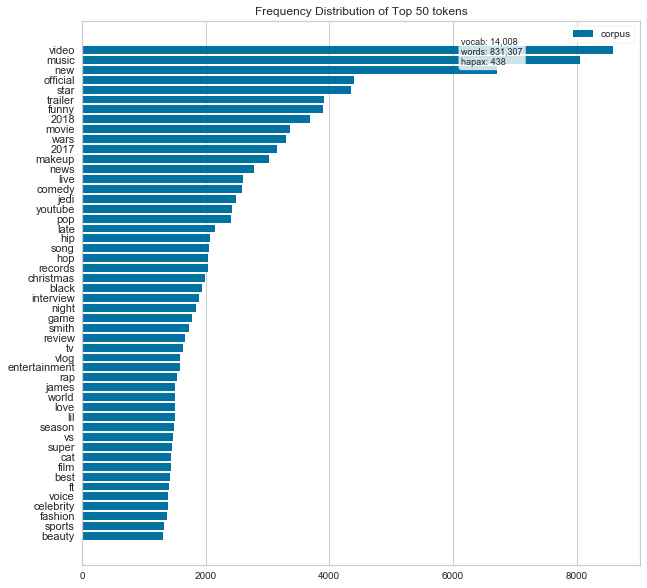

In [208]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(tags_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

Frequency distribution for UK youtube data: tags

### Plot token frequency distribution <font color = "#2ECC71"> Channel title </font>

In [209]:
GB_youtube_df['channel_title'] = GB_youtube_df['channel_title'].astype('U')

GB_youtube_df['channel_title']

In [211]:
channel_text = GB_youtube_df['channel_title'].str.lower()

In [212]:
vectorizer.fit(channel_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

print(vectorizer.vocabulary_)

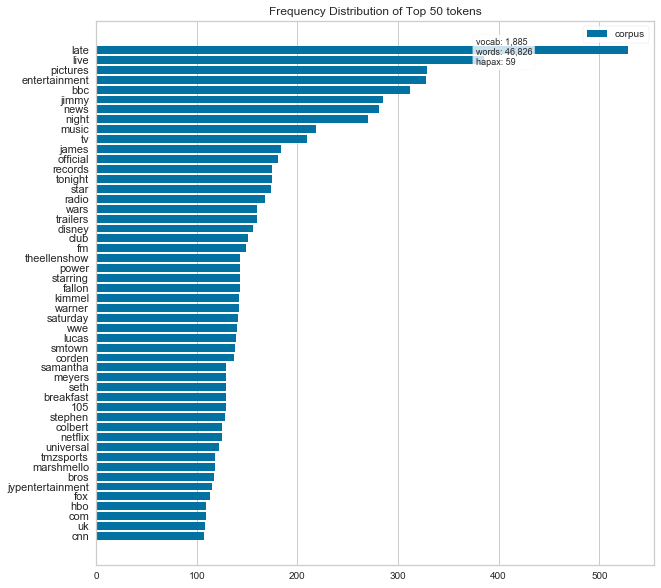

In [214]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(channel_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

Frequency distribution of tokens for UK youtube data: channel_title

In [ ]:
#Access vocabulary to see what was tokenizes
#print(vectorizer.vocabulary_)

Yellowbrick for vocab presentation

In [ ]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=GB_X, algorithm='covariance')
visualizer.fit(GB_X, GB_y)                # Fit the data to the visualizer
visualizer.transform(GB_X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [ ]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

In [ ]:
# Load the classification data set
data = GB_youtube_df

# Specify the features of interest
features = data['views']

#features = ['documentary','episode','ft','itunes','music','official','podcast','spotify','subscribe','cat','dog','makeup','ASMR']
# features = [
#         'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
#         'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
#         'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
#         'jul_pay', 'aug_pay', 'sep_pay',
#     ]

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.default.as_matrix()

## Parsing json file

In [ ]:
def makeDataFrame(jsonData):
    listOfId=[]
    listOfGenre=[]
    for i in jsonData['items']:
        listOfId.append(i['id'])
        listOfGenre.append(i['snippet']['title'])

    genreIds={}
    genreIds['id']=listOfId
    genreIds['Genre']=listOfGenre
    genreDf=pd.DataFrame.from_dict(genreIds)
    return genreDf